# Gastrulation

In [1]:
%load_ext autoreload
%load_ext autotime

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir='/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

time: 3.88 s (started: 2022-06-03 14:18:28 -05:00)


## Load detail

In [2]:
cellDancer_df_file='/Users/pengzhizhang/pseudotime/data/Gastrulation/velocity_result/celldancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880


time: 40.9 s (started: 2022-06-03 14:19:12 -05:00)


NameError: name 'alpha_inside' is not defined

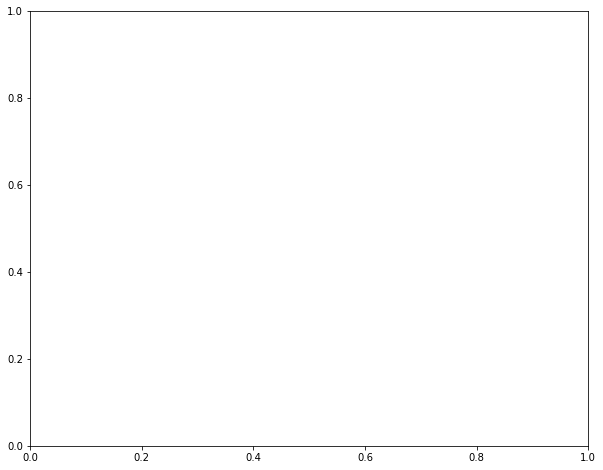

time: 1min 1s (started: 2022-06-03 14:20:06 -05:00)


In [3]:
%autoreload 2

# Set Parameters
projection_neighbor_choice='gene'
expression_scale='power10'
projection_neighbor_size=10
speed_up=(100,100)

# Compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# Plot cell velocity
# Set Parameters
min_mass=15
arrow_grid=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]

fig, ax = plt.subplots(figsize=(10,8))
im = cdplt.cell.scatter_cell(
    ax,cellDancer_df, 
    colors=colormap.colormap_erythroid, 
    alpha=0.6, 
    s=10,
    velocity=True, 
    legend='on',
    min_mass=min_mass,
    arrow_grid=arrow_grid, 
    custom_xlim=custom_xlim, 
    custom_ylim=custom_ylim)
ax.axis('off')
plt.show()

In [4]:
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629,0,NaN,NaN
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734,1,NaN,NaN
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069,2,-0.111304,-0.062523
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825,3,0.365885,0.094445
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037,12324,NaN,NaN
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736,12325,NaN,NaN
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099,12326,NaN,NaN
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880,12327,NaN,NaN


time: 16.3 ms (started: 2022-06-03 14:21:17 -05:00)


## Estimate pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 9410/9410 [00:11<00:00, 837.48it/s] 


use path_similarity:  0.25
There are 3 clusters.
[0 1 2]


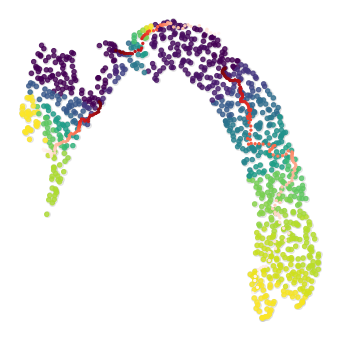




Cluster  0
Total cells in the cluster:  635
MAX allowed zero time cells:  31
MAX allowed terminal cells:  31
Only  18  terminal cells left.
[277, 282, 287, 291, 293, 295, 300, 321, 596, 797, 799, 839, 875, 880, 886, 904, 914, 919]
33  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  33
MAX allowed zero time cells:  31
MAX allowed terminal cells:  31
Only  2  zero cells left. 
[25, 329]
Only  24  terminal cells left.
[1, 42, 52, 53, 58, 82, 127, 138, 183, 195, 211, 236, 238, 247, 267, 657, 668, 669, 688, 733, 748, 756, 783, 785]
number of paths:  2
number of subclusters:  2

Display reference paths for cluster 0


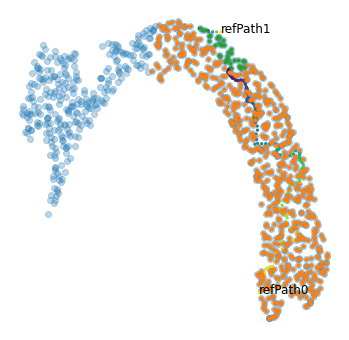


intercluster cell time adjustment
number of cells:  635
Cutoff is  0.06358556024056332
Number of nodes:  2
clusterIDs:  [0, 1]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (255, 127)
pair_cellIDs:  (726, 53)
pair_cellIDs:  (239, 785)
pair_cellIDs:  (681, 355)
pair_cellIDs:  (747, 1)
pair_cellIDs:  (689, 782)
pair_cellIDs:  (544, 236)
pair_cellIDs:  (663, 195)
pair_cellIDs:  (693, 247)
pair_cellIDs:  (39, 329)
pair_cellIDs:  (61, 756)
pair_cellIDs:  (116, 688)
pair_cellIDs:  (207, 748)
pair_cellIDs:  (708, 25)
pair_cellIDs:  (141, 668)
pair_cellIDs:  (761, 138)
pair_cellIDs:  (751, 183)
pair_cellIDs:  (352, 680)
pair_cellIDs:  (735, 733)
pair_cellIDs:  (20, 72)
pair_cellIDs:  (732, 52)
pair_cellIDs:  (788, 267)
pair_cellIDs:  (556, 82)
pair_cellIDs:  (768, 344)
pair_cellIDs:  (59, 58)

Peak mode:  most_frequent_shift


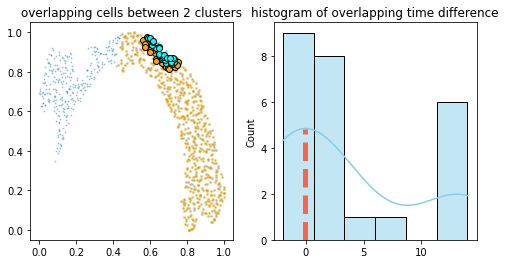

Time shift is:  -1
The overlapping cells are: 
cell  681  from cluster  0  and  355  from cluster  1


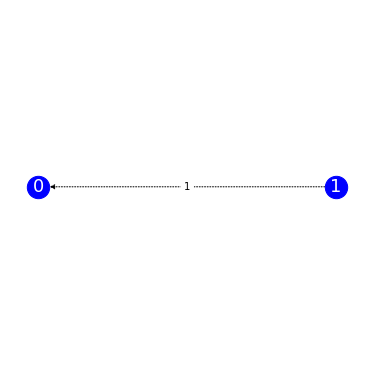

Connected components:  {0, 1}
All nodes adjustment:  {0: 0, 1: -1}



Cluster  1
Total cells in the cluster:  152
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  4  terminal cells left.
[47, 98, 346, 351]
97  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  1
Total cells in the cluster:  97
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  3  zero cells left. 
[314, 503, 874]
35  terminal cells left.
Sample trajs for terminal cells in cluster  1  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  1
Total cells in the cluster:  35
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  3  zero cells left. 
[8, 67, 672]
13  terminal cells left.
Sample trajs for terminal cells in cluster  1  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  1
Total cells in the cluster:  13


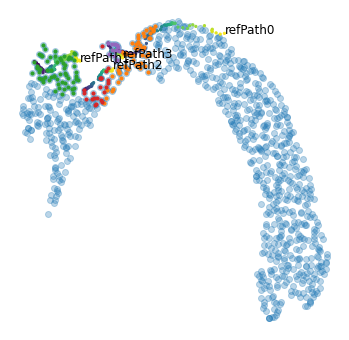


intercluster cell time adjustment
number of cells:  152
Cutoff is  0.020539781195275626
Number of nodes:  4
clusterIDs:  [0, 1, 2, 3]

Consolidating time between clusters  0  and  1 ...
No close cells between clusters	 (0, 1)

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (359, 536)
pair_cellIDs:  (347, 528)
pair_cellIDs:  (513, 340)

Peak mode:  least_shift


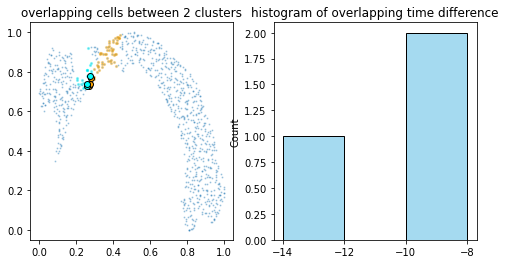

Time shift is:  -8
The overlapping cells are: 
cell  359  from cluster  0  and  536  from cluster  2

Consolidating time between clusters  0  and  3 ...
pair_cellIDs:  (231, 324)

Peak mode:  least_shift


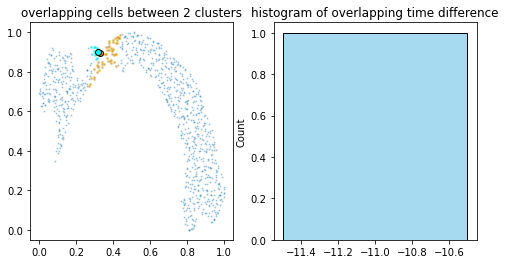

Time shift is:  -11
The overlapping cells are: 
cell  231  from cluster  0  and  324  from cluster  3

Consolidating time between clusters  1  and  2 ...
No close cells between clusters	 (1, 2)

Consolidating time between clusters  1  and  3 ...
No close cells between clusters	 (1, 3)

Consolidating time between clusters  2  and  3 ...
No close cells between clusters	 (2, 3)


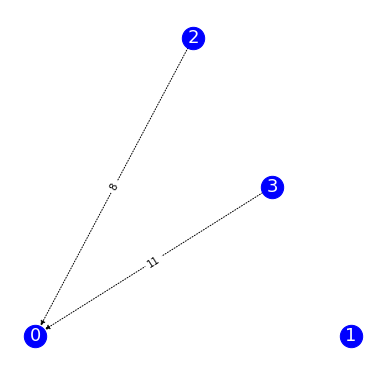

Connected components:  {0, 2, 3}
Connected components:  {1}
All nodes adjustment:  {0: 0, 1: 0, 2: -8, 3: -11}



Cluster  2
Total cells in the cluster:  154
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  2  zero cells left. 
[6, 10]
29  terminal cells left.
Sample trajs for terminal cells in cluster  2  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  2
Total cells in the cluster:  29
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  2  zero cells left. 
[552, 884]
19  terminal cells left.
Sample trajs for terminal cells in cluster  2  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  2
Total cells in the cluster:  19
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  2  zero cells left. 
[482, 543]
Only  6  terminal cells left.
[217, 417, 459, 583, 599, 719]
number of paths:  3
number of subclusters:  3

Display reference paths for cluster 2


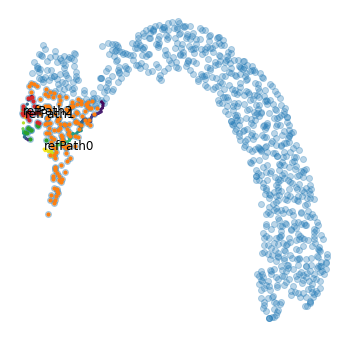


intercluster cell time adjustment
number of cells:  154
Cutoff is  0.02946501596303442
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (860, 884)
pair_cellIDs:  (667, 384)

Peak mode:  least_shift


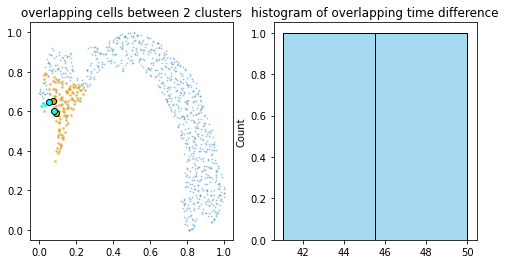

Time shift is:  41
The overlapping cells are: 
cell  667  from cluster  0  and  384  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (626, 393)
pair_cellIDs:  (234, 781)
pair_cellIDs:  (483, 482)
pair_cellIDs:  (667, 719)
pair_cellIDs:  (649, 543)

Peak mode:  most_frequent_shift


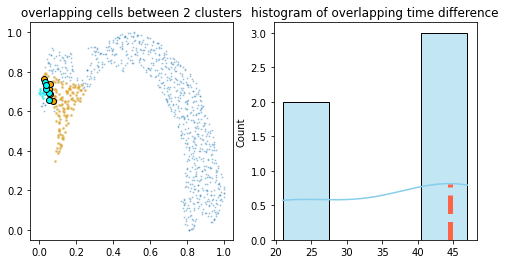

Time shift is:  46
The overlapping cells are: 
cell  626  from cluster  0  and  393  from cluster  2

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (673, 719)
pair_cellIDs:  (384, 599)
pair_cellIDs:  (205, 583)

Peak mode:  least_shift


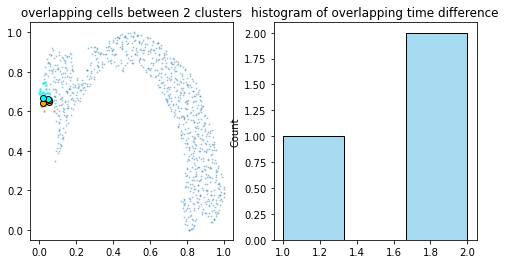

Time shift is:  1
The overlapping cells are: 
cell  205  from cluster  1  and  583  from cluster  2


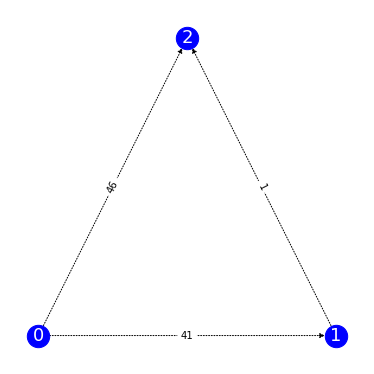

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: 41, 2: 42}



All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  941
Cutoff is  0.06481926683062308
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (865, 142)
pair_cellIDs:  (126, 47)
pair_cellIDs:  (71, 529)
pair_cellIDs:  (26, 98)
pair_cellIDs:  (774, 351)
pair_cellIDs:  (31, 37)
pair_cellIDs:  (45, 346)
pair_cellIDs:  (775, 107)
pair_cellIDs:  (91, 558)
pair_cellIDs:  (700, 36)
pair_cellIDs:  (343, 356)
pair_cellIDs:  (19, 60)
pair_cellIDs:  (595, 129)
pair_cellIDs:  (230, 167)
pair_cellIDs:  (66, 675)

Peak mode:  most_frequent_shift


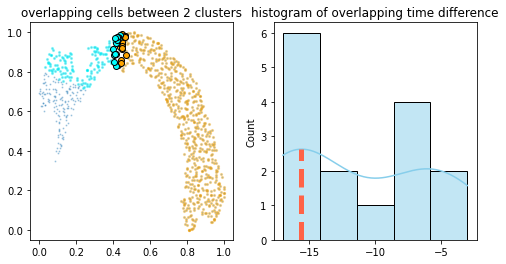

Time shift is:  -16
The overlapping cells are: 
cell  343  from cluster  0  and  356  from cluster  1

Consolidating time between clusters  0  and  2 ...
No close cells between clusters	 (0, 2)

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (7, 10)
pair_cellIDs:  (654, 439)
pair_cellIDs:  (672, 6)
pair_cellIDs:  (778, 110)
pair_cellIDs:  (520, 511)
pair_cellIDs:  (517, 363)
pair_cellIDs:  (426, 486)
pair_cellIDs:  (752, 572)
pair_cellIDs:  (771, 817)
pair_cellIDs:  (118, 706)
pair_cellIDs:  (67, 592)
pair_cellIDs:  (114, 305)
pair_cellIDs:  (602, 171)
pair_cellIDs:  (79, 390)
pair_cellIDs:  (326, 350)
pair_cellIDs:  (525, 514)
pair_cellIDs:  (755, 303)
pair_cellIDs:  (202, 250)
pair_cellIDs:  (446, 787)
pair_cellIDs:  (536, 521)
pair_cellIDs:  (8, 779)
pair_cellIDs:  (109, 345)
pair_cellIDs:  (148, 734)
pair_cellIDs:  (272, 182)
pair_cellIDs:  (374, 627)
pair_cellIDs:  (571, 736)
pair_cellIDs:  (340, 332)

Peak mode:  most_frequent_shift


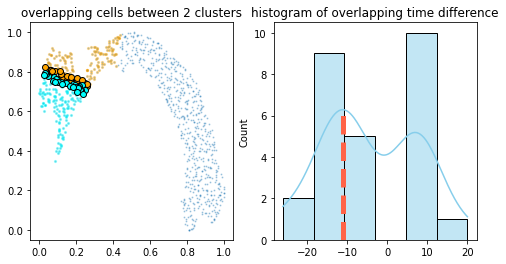

Time shift is:  -11
The overlapping cells are: 
cell  426  from cluster  1  and  486  from cluster  2


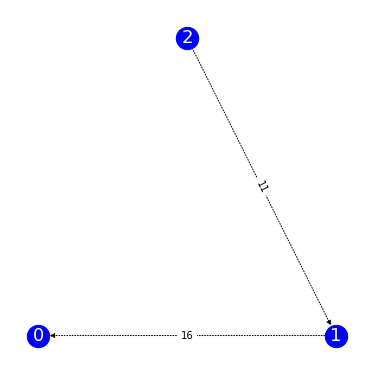

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: -16, 2: -27}


All inter cluster cell time has been resolved.



There are 12329 cells.


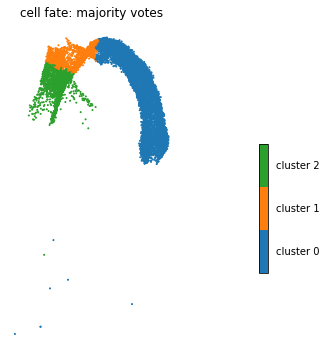

--- 109.5404040813446 seconds ---
time: 1min 49s (started: 2022-06-03 14:23:39 -05:00)


In [7]:
%autoreload 2

cell_time = dict()
dt = 0.05
#t_total = {dt:int(10/dt)} 
t_total = {0.05: 200}
n_repeats = 10

grid = (30, 30)

load_cellDancer = pseudo_time(
    cellDancer_df=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    speed_up=speed_up,
    n_paths = 3,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=-2)

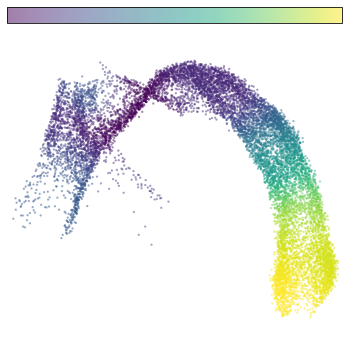

time: 8.29 s (started: 2022-06-03 14:25:46 -05:00)


In [8]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

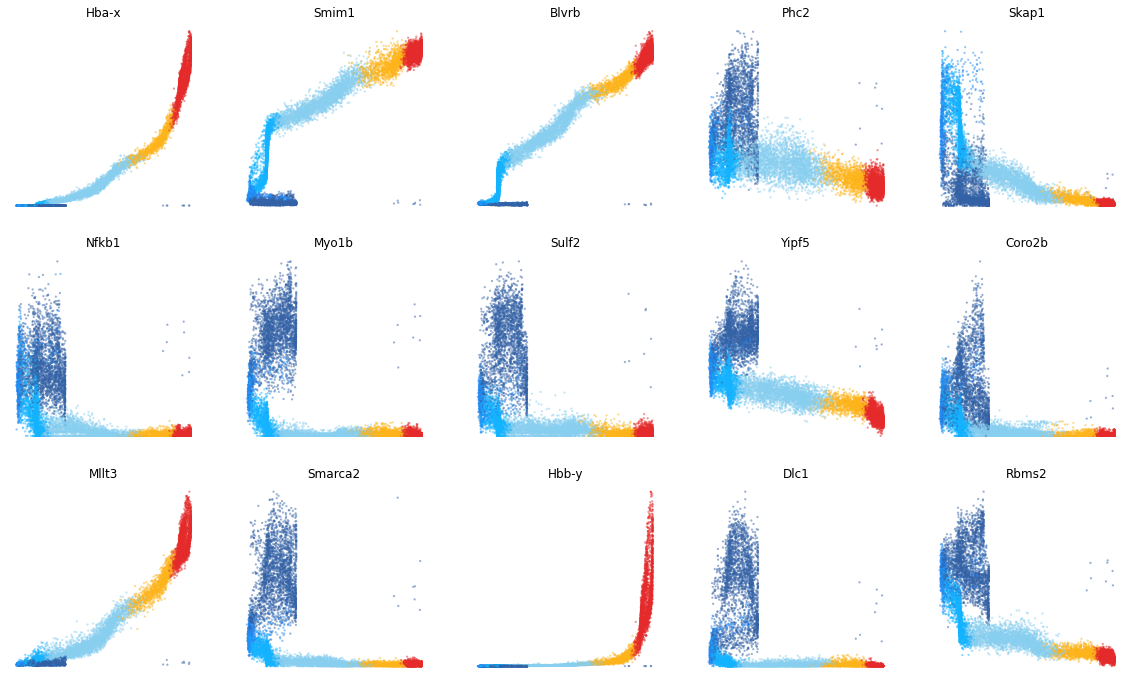

time: 35.2 s (started: 2022-06-03 14:26:37 -05:00)


In [9]:
# Show legend only
#_, ax = plt.subplots()
#cdplt.gene.scatter_gene(ax=ax,legend='only', colors=colormap.colormap_erythroid, s = 10, gene_name=None)
#ax.axis('off')
#plt.show()
gene_list=['Hba-x','Smim1','Blvrb','Phc2','Skap1',
           'Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b',
           'Mllt3','Smarca2', 'Hbb-y','Dlc1','Rbms2']

import math
ncols=5
fig = plt.figure(figsize=(4*ncols,4*len(gene_list)/ncols))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')


## Graph representation of the cell fates


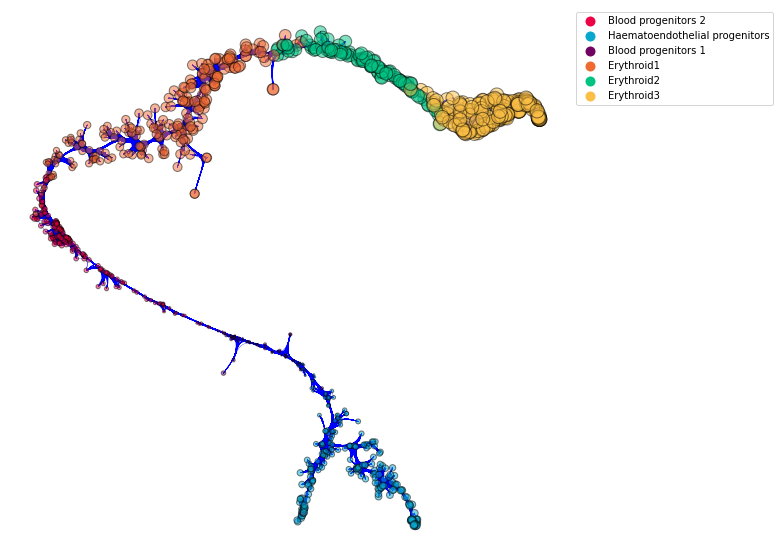

time: 43.1 s (started: 2022-06-03 17:23:00 -05:00)


In [85]:
%autoreload 2

from celldancer.plotting import graph
fig, ax = plt.subplots(figsize=(10,10))
graph.graph(ax, 
    load_cellDancer, 
    node_layout='forcedirected', 
    use_edge_bundling=True, 
    node_colors='clusters', 
    edge_length=1, 
    node_sizes='pseudotime', 
    colorbar='on',
    legend='on')